In [1]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz


# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
os.chdir("C:\\Users\\user\\Desktop\\ML Files")

In [5]:
df = pd.read_csv('Real_fake_news.csv')

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [8]:
df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [9]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder()

In [10]:
df['author']= le.fit_transform(df['author'])
df['source']= le.fit_transform(df['source'])

In [11]:
X=df[['author','source']]

In [12]:
y=df['BinaryNumTarget']


In [13]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [14]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  
print()

# 2.5.2 Test data:

X_test.shape  
print()

(3409, 2)

(1461, 2)

In [15]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [16]:
ct.fit(X_train,y_train)


DecisionTreeClassifier()

In [17]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [18]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size 

0.8446269678302533

<Figure size 1080x1080 with 0 Axes>

[Text(418.5, 733.86, 'node #0\nauthor <= 1.554\ngini = 0.5\nsamples = 3409\nvalue = [1704, 1705]\nclass = Real'),
 Text(209.25, 570.78, 'node #1\nauthor <= -0.379\ngini = 0.493\nsamples = 2977\nvalue = [1309, 1668]\nclass = Real'),
 Text(104.625, 407.70000000000005, 'node #2\nauthor <= -0.741\ngini = 0.484\nsamples = 1750\nvalue = [1031, 719]\nclass = Fake'),
 Text(52.3125, 244.62, 'node #3\nauthor <= -1.306\ngini = 0.415\nsamples = 677\nvalue = [199, 478]\nclass = Real'),
 Text(26.15625, 81.54000000000008, '\n  (...)  \n'),
 Text(78.46875, 81.54000000000008, '\n  (...)  \n'),
 Text(156.9375, 244.62, 'node #224\nauthor <= -0.614\ngini = 0.348\nsamples = 1073\nvalue = [832, 241]\nclass = Fake'),
 Text(130.78125, 81.54000000000008, '\n  (...)  \n'),
 Text(183.09375, 81.54000000000008, '\n  (...)  \n'),
 Text(313.875, 407.70000000000005, 'node #429\nauthor <= 1.266\ngini = 0.35\nsamples = 1227\nvalue = [278, 949]\nclass = Real'),
 Text(261.5625, 244.62, 'node #430\nauthor <= -0.097\ngini 

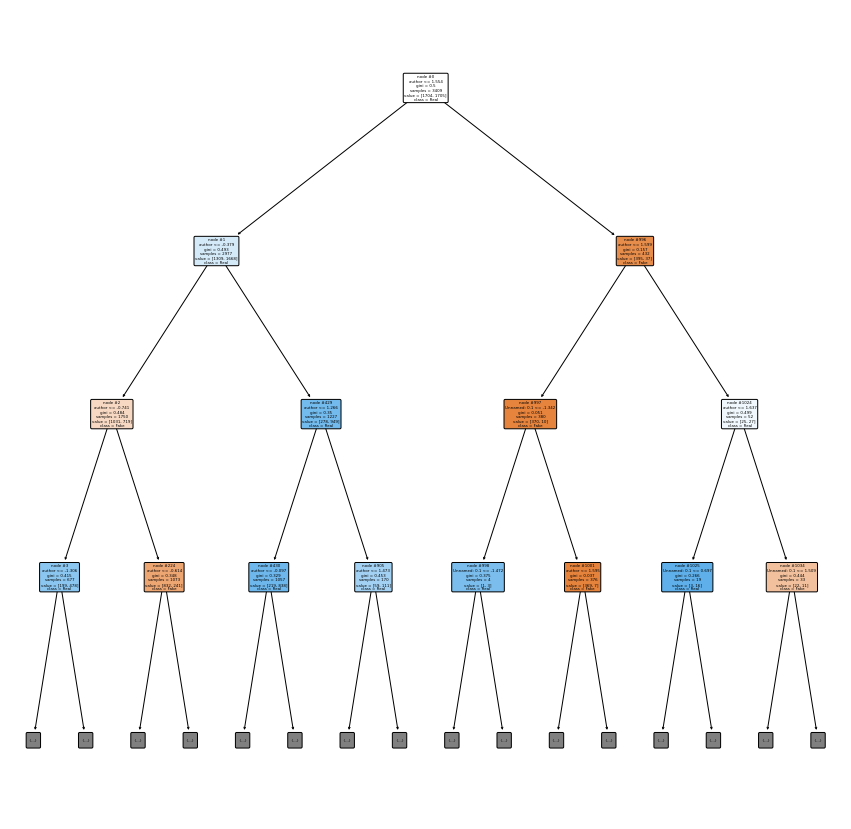

In [19]:
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

plt.show()

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(418.5, 733.86, 'node #0\nauthor <= 1.554\nentropy = 1.0\nsamples = 3409\nvalue = [1704, 1705]\nclass = Real'),
 Text(209.25, 570.78, 'node #1\nauthor <= -0.368\nentropy = 0.989\nsamples = 2977\nvalue = [1309, 1668]\nclass = Real'),
 Text(104.625, 407.70000000000005, 'node #2\nauthor <= -0.741\nentropy = 0.977\nsamples = 1755\nvalue = [1033, 722]\nclass = Fake'),
 Text(52.3125, 244.62, 'node #3\nauthor <= -1.306\nentropy = 0.874\nsamples = 677\nvalue = [199, 478]\nclass = Real'),
 Text(26.15625, 81.54000000000008, '\n  (...)  \n'),
 Text(78.46875, 81.54000000000008, '\n  (...)  \n'),
 Text(156.9375, 244.62, 'node #218\nauthor <= -0.614\nentropy = 0.772\nsamples = 1078\nvalue = [834, 244]\nclass = Fake'),
 Text(130.78125, 81.54000000000008, '\n  (...)  \n'),
 Text(183.09375, 81.54000000000008, '\n  (...)  \n'),
 Text(313.875, 407.70000000000005, 'node #429\nauthor <= 1.266\nentropy = 0.771\nsamples = 1222\nvalue = [276, 946]\nclass = Real'),
 Text(261.5625, 244.62, 'node #430\nauth

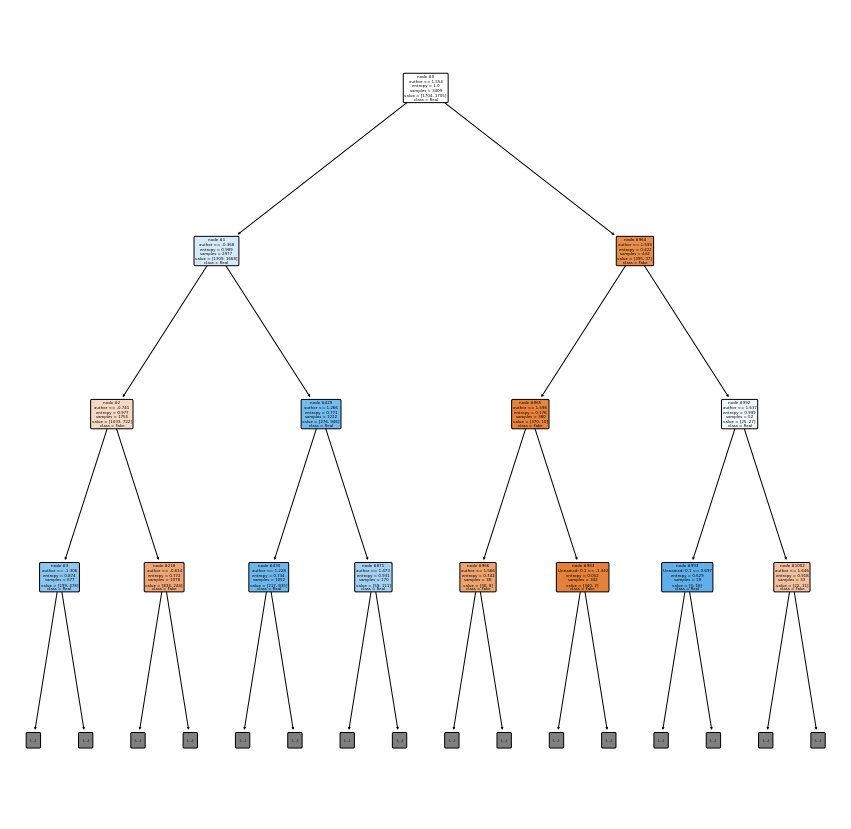

In [20]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
ct.fit(X_train,y_train)

# 5.2
plt.figure(figsize=(15,15))
plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

plt.show()

DecisionTreeClassifier(criterion='entropy')

<Figure size 1080x1080 with 0 Axes>

[Text(440.91964285714283, 733.86, 'node #0\nauthor <= 1.596\nentropy = 1.0\nsamples = 3407\nvalue = [1703, 1704]\nclass = Real'),
 Text(239.14285714285714, 570.78, 'node #1\nauthor <= -0.356\nentropy = 0.991\nsamples = 3013\nvalue = [1339, 1674]\nclass = Real'),
 Text(119.57142857142857, 407.70000000000005, 'node #2\nauthor <= -0.741\nentropy = 0.976\nsamples = 1751\nvalue = [1034, 717]\nclass = Fake'),
 Text(59.785714285714285, 244.62, 'node #3\nauthor <= -1.306\nentropy = 0.883\nsamples = 687\nvalue = [207, 480]\nclass = Real'),
 Text(29.892857142857142, 81.54000000000008, '\n  (...)  \n'),
 Text(89.67857142857143, 81.54000000000008, '\n  (...)  \n'),
 Text(179.35714285714286, 244.62, 'node #220\nauthor <= -0.615\nentropy = 0.765\nsamples = 1064\nvalue = [827, 237]\nclass = Fake'),
 Text(149.46428571428572, 81.54000000000008, '\n  (...)  \n'),
 Text(209.25, 81.54000000000008, '\n  (...)  \n'),
 Text(358.7142857142857, 407.70000000000005, 'node #427\nauthor <= 1.266\nentropy = 0.798\n

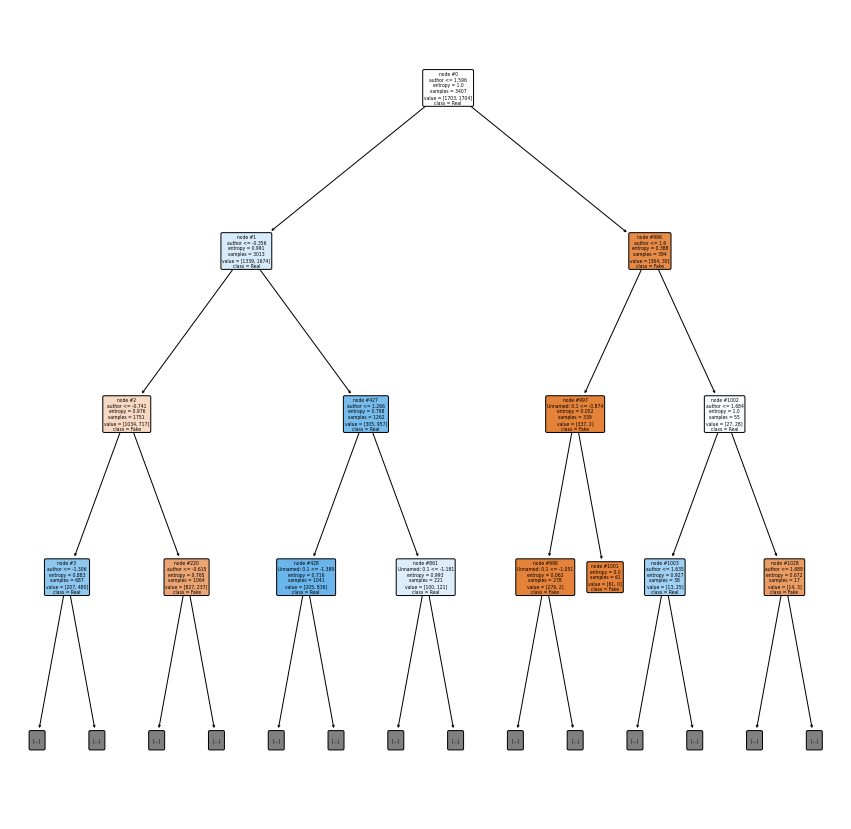

In [21]:
# 5.3 Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
ct1.fit(X_train[2:,:],y_train[2:])

##
plt.figure(figsize=(15,15))
plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

plt.show()

In [22]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.9322381930184805